# Publishing
Publishing is all about making your data accessible and presentable to the world. That includes performing analysis, creating visualizations, and writing up your results.

***

## Learning Objectives

# Links
* [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781098104023/?_gl=1*16loshi*_ga*MjE0NTUzMjk3My4xNjkzMjkxNzc5*_ga_092EL089CH*MTY5MzI5MTc3OS4xLjEuMTY5MzI5MTc5MS40OC4wLjA.) by Wes McKinney
* [Data Vizualization](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html) by Jake VanderPlas
* [Python Data Visualization](https://realpython.com/tutorials/data-viz/)
# Additional Material

# Sources 


## Performing Analysis
Performing analysis is the process of exploring your data and answering questions about it. This is the most important part of the research process, and it is also the most fun.
Analysing data is a complete course on its own. We will not go into detail here, but we will give you some pointers to get you started. There are wonderful books and resources on the topic, and I'll include some links in the `#Links` section

### Generating Fake data
The power of Python is in its ecosystem. There are packages for almost anything. We can use a package called `faker` to generate fake data for us to play around with. We will use this data to demonstrate some analysis techniques.

In [ ]:
!pip install faker  

In [ ]:
import csv
import random
import faker

# Create a Faker instance to generate random data
fake = faker.Faker()

# Define the number of rows of data to generate
num_rows = 100

# Create a list to store the data
data = []


# Generate random sales data
for _ in range(num_rows):
    date = fake.date_between(start_date='-1y', end_date='today')
    product = fake.random_element(elements=('Widget', 'Gadget', 'Doodad'))
    revenue = round(random.uniform(10, 1000), 2)
    quantity = random.randint(1, 10)
    data.append([date, product, revenue, quantity])

# Define the CSV file name
csv_file = 'sales_data.csv'

# Write the data to the CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow(['Date', 'Product', 'Revenue', 'Quantity'])
    
    # Write the data rows
    writer.writerows(data)

print(f"Generated {num_rows} rows of sales data in {csv_file}.")


Just like that, we generated a CSV file with 1000 rows of fake data. We can now use this data to demonstrate some analysis techniques.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('sales_data.csv')

# Explore the first few rows of the dataset. We've already used the head() method to do this.
print("Sample Data:")
print(data.head())



In [ ]:

#To get some statistics on the data, you use describe()
# Summary statistics
summary_stats = data.describe()
print("\nSummary Statistics:")
print(summary_stats)


You'll get to love the describe function. It gives you a quick overview of your data. It shows you the count, mean, standard deviation, minimum, maximum, and the quartiles of your data. It is a great way to get a quick overview of your data.

Say we are only interested in the total revenue. It's easy to get the sum of the revenue using a combination of the index operator  - `[]` - and the `sum` function.

In [ ]:

# Total revenue
total_revenue = data['Revenue'].sum()
print(f"\nTotal Revenue: ${total_revenue:.2f}")

Note the `:.2f` in the `print` line. Can you tell what it's doing?

The .2f is a format specifier. It tells Python to format the number as a float with 2 decimal places. You can read more about format specifiers [here](https://www.w3schools.com/python/ref_string_format.asp)

Here is an example of grouping data 


In [ ]:


# Group data by product and calculate mean revenue
product_mean_revenue = data.groupby('Product')['Revenue'].mean()
print("\nMean Revenue by Product:")
print(product_mean_revenue)

In [ ]:
# Group data by product and calculate total revenue
product_total_revenue = data.groupby('Product')['Revenue'].sum()
print("\nTotal Revenue by Product:")   
print(product_total_revenue)

The `groupby` means: Take each `Product` and the the `mean()` or average of the `Revenue` column. I.E. get the average revenue for each product. To get the total revenue, we can use the `sum()` function instead of the `mean()` function.

In [17]:
product_total_revenue = data.groupby('Product')['Revenue'].sum()
print("\nTotal Revenue by Product:")
print(product_total_revenue)


Total Revenue by Product:
Product
Doodad    12124.88
Gadget    14387.92
Widget    23565.85
Name: Revenue, dtype: float64


Sometimes a picture is worth a thousand words. We can use the `plot` function to create a bar chart of the total revenue per product.

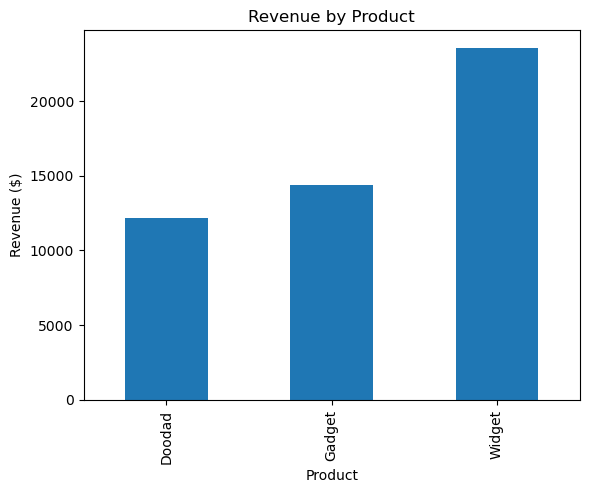

In [18]:
# Visualize data
# Plotting a bar chart of revenue by product
product_revenue = data.groupby('Product')['Revenue'].sum()
product_revenue.plot(kind='bar')
plt.title('Revenue by Product') 
plt.ylabel('Revenue ($)')
plt.show()


## Visualizing Data
Visualizing data is the process of creating charts and graphs to help you understand your data. It is a very important part of the analysis process. It is also a very important part of the publication process. You can use visualizations to communicate your findings to others. We already saw an example of a visualization in the previous section. Let's look at some more examples.

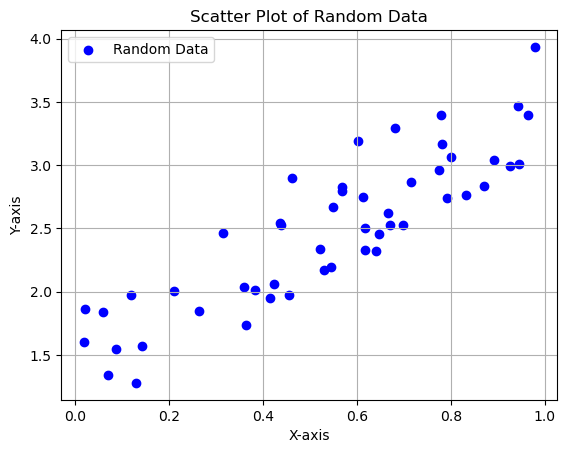

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(0)
x = np.random.rand(50)  # 50 random x-values
y = 2 * x + 1 + np.random.rand(50)  # Corresponding random y-values

# Create a scatter plot
plt.scatter(x, y, label='Random Data', color='blue', marker='o')

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Random Data')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Add grid lines
plt.show()

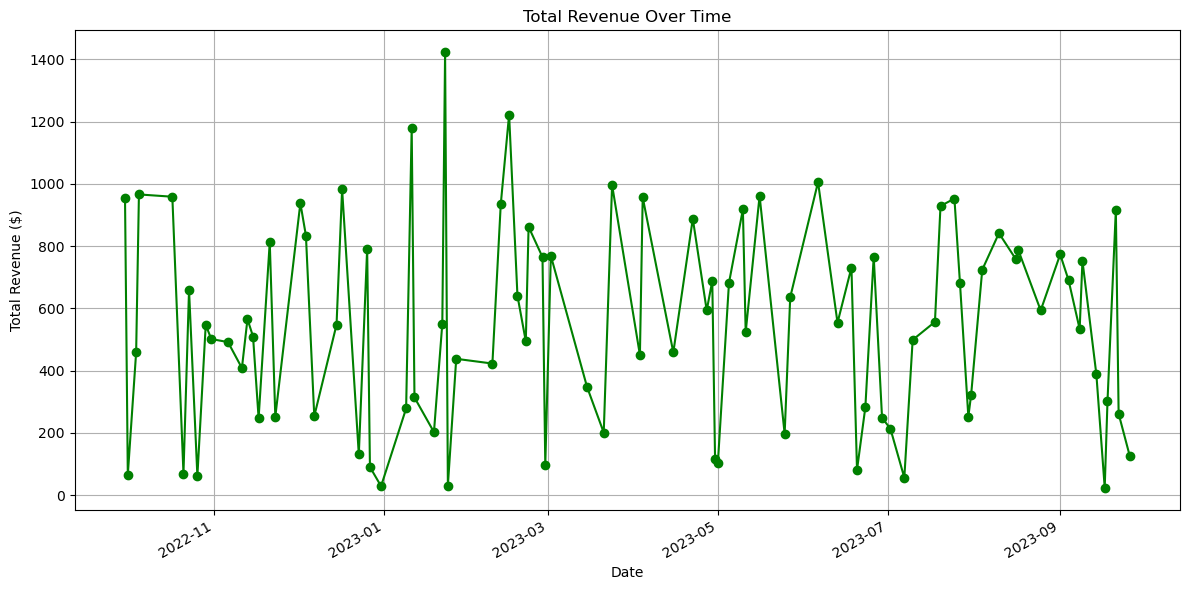

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('sales_data.csv')

# Convert the "Date" column to a datetime data type
data['Date'] = pd.to_datetime(data['Date'])

# Group the data by the date and calculate the total daily revenue
daily_revenue = data.groupby('Date')['Revenue'].sum()

# Create a line chart to visualize the trend in total revenue over time
plt.figure(figsize=(12, 6))  # Set the figure size
daily_revenue.plot(kind='line', color='green', marker='o', linestyle='-')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.grid(True)  # Add grid lines

# Display the plot
plt.tight_layout()
plt.show()


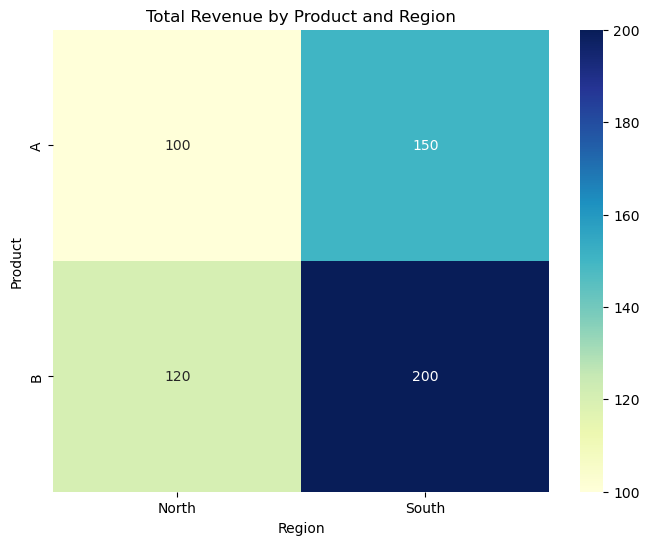

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for heatmap styling

# Sample pivot table data (replace with your pivot table data)
data = {
    'North': {'A': 100, 'B': 120},
    'South': {'A': 150, 'B': 200}
}

# Create a DataFrame from the pivot table data
pivot_table = pd.DataFrame(data)

# Create a heatmap to visualize the pivot table
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Total Revenue by Product and Region')
plt.xlabel('Region')
plt.ylabel('Product')

# Display the heatmap
plt.show()


The possibilities are almost endless. Data visualization is another field unto itself. 

In [25]:
!pip install plotly --upgrade
!pip install chart_studio

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 9.5 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: plotly
    Found existing installation: plotly 5.16.1
    Uninstalling plotly-5.16.1:
      Successfully uninstalled plotly-5.16.1


## Writing up your results
Writing up your results is the process of communicating your findings to others. This is the final step in the research process. It is also the most important step. If you don't communicate your findings, then your research is useless.

Let's create a few reports in different formats.

In [29]:
!pip install reportlab


### Creating a PDF report

In [30]:
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet

# Sample data for the report
data = [
    ["Name", "Age", "City"],
    ["Alice", 28, "New York"],
    ["Bob", 32, "Los Angeles"],
    ["Charlie", 24, "Chicago"],
]

# Create a PDF document
pdf_file = "sample_report.pdf"
document = SimpleDocTemplate(pdf_file, pagesize=letter)

# Create a list of flowables (elements to add to the PDF)
elements = []

# Create a title
title_style = getSampleStyleSheet()["Title"]
title = Paragraph("Sample Report", title_style)
elements.append(title)

# Add a paragraph of text
text = """
This is a sample report generated using Python and the ReportLab library.
It contains a table with some sample data.
"""
paragraph_style = getSampleStyleSheet()["Normal"]
paragraph = Paragraph(text, paragraph_style)
elements.append(paragraph)

# Create a table
table_style = TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black)
])

report_table = Table(data, style=table_style)
elements.append(report_table)

# Build the PDF document
document.build(elements)

print(f"Report generated and saved as {pdf_file}")


Report generated and saved as sample_report.pdf


## Excel Reports


In [ ]:
pip install XlsxWriter

In [1]:
import pandas as pd

# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 28, 35],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create an Excel writer object
excel_writer = pd.ExcelWriter('sample_excel.xlsx', engine='xlsxwriter')

# Write the DataFrame to the Excel file
df.to_excel(excel_writer, sheet_name='Sheet1', index=False)

# Save the Excel file
excel_writer.save()

print("Sample Excel spreadsheet created as 'sample_excel.xlsx'")


Sample Excel spreadsheet created as 'sample_excel.xlsx'


/var/folders/fj/7x93gj6n0yz2yg04qtkg7rc40000gn/T/ipykernel_9106/558571838.py:20: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


## CSV

In [2]:
import pandas as pd

# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 28, 35],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Specify the CSV file path
csv_file = 'sample_csv.csv'

# Export the DataFrame to a CSV file
df.to_csv(csv_file, index=False)

print(f"CSV report created as '{csv_file}'")


CSV report created as 'sample_csv.csv'
